In [154]:
import pandas as pd
import re
import numpy as np

import requests
## import and clean crime data
DATA_URL = 'https://data.montreal.ca/dataset/5829b5b0-ea6f-476f-be94-bc2b8797769a/resource/c6f482bf-bf0f-4960-8b2f-9982c211addd/download/interventionscitoyendo.csv'



df_crime = pd.read_csv(DATA_URL, encoding = "ISO-8859-1")
lowercase = lambda x: str(x).lower()
df_crime.rename(lowercase, axis='columns', inplace=True)
# df_crime = pd.read_csv('interventionscitoyendo.csv',encoding = "ISO-8859-1")
# df_crime.head()
df_crime_modified = df_crime.copy()
df_crime_modified.columns = df_crime_modified.columns.str.lower()
df_crime_modified.head()
df_crime_modified.describe()
df_crime_modified.longitude = df_crime_modified.longitude.astype(str)
df_crime_modified.latitude = df_crime_modified.latitude.astype(str)
df_crime_modified.longitude
df_crime_modified.longitude = df_crime_modified.longitude.str.slice(0,7)
df_crime_modified.latitude = df_crime_modified.latitude.str.slice(0,6)
df_crime_modified['long lat'] = df_crime_modified.longitude.astype(str) + ', '+ df_crime_modified.latitude.astype(str)
df_crime_modified.head()
df_crime_modified.loc[df_crime_modified['latitude'] == '1.0']

## import coordinadte data 
df_corr = pd.read_csv('CanadianPostalCodes202108.csv')
df_corr.head()
df_corr.LONGITUDE = df_corr.LONGITUDE.astype(str)
df_corr.LATITUDE = df_corr.LATITUDE.astype(str)
df_corr.LONGITUDE = df_corr.LONGITUDE.str.slice(0,7)
df_corr.LATITUDE = df_corr.LATITUDE.str.slice(0,6)
df_corr['long lat'] = df_corr.LONGITUDE + ', ' + df_corr.LATITUDE
df_corr_dropped = df_corr.drop_duplicates(subset='long lat')

df_corr_dropped
## Merge Data from crime data and postal code data
df_merged = pd.merge(left = df_crime_modified, right=df_corr_dropped, how='left', left_on=['long lat'], right_on=['long lat'])
df_merged

df_merged
df_merged.describe()
df_merged
df_merged.drop(columns=['PROVINCE_ABBR','TIME_ZONE','LATITUDE','LONGITUDE','x','y','longitude','latitude','pdq'], inplace = True)
df_merged.head()
df_merged.describe()
df_merged['postal'] = df_merged.POSTAL_CODE.str.slice(0,3)
df_merged
## Import borough postal code data
df_postal = pd.read_csv('Montreal Postal Codes.csv')
df_postal.head()
df_final = pd.merge(left=df_merged, right= df_postal, left_on='postal', right_on='postal codes')

df_final.head()
df_final['borough'].value_counts().reset_index().to_csv('incidents per b.csv')
df_final.columns = df_final.columns.str.lower()
df_final.drop(columns=['postal'], inplace=True)
df_final.head()

,categorie,date,quart,long lat,postal_code,city,postal codes,borough
0,Vol de véhicule à moteur,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest
1,Vol de véhicule à moteur,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest
2,Introduction,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest
3,Méfait,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest
4,Méfait,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest


In [155]:
df_final['borough1']= [i for i in df_final['borough'].str.split(r'(?<=[a-z])(?=[A-Z])')]
df_final

,categorie,date,quart,long lat,postal_code,city,postal codes,borough,borough1
0,Vol de véhicule à moteur,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]"
1,Vol de véhicule à moteur,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]"
2,Introduction,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]"
3,Méfait,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]"
4,Méfait,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]"
...,...,...,...,...,...,...,...,...,...
136108,Vol de véhicule à moteur,2020-03-25,jour,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]"
136109,Vol de véhicule à moteur,2020-03-27,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]"
136110,Méfait,2021-04-01,nuit,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]"
136111,Introduction,2021-06-06,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]"


In [156]:
df_final['neighbourhood'] = df_final['borough1'].map(lambda x: x[0])
df_final

,categorie,date,quart,long lat,postal_code,city,postal codes,borough,borough1,neighbourhood
0,Vol de véhicule à moteur,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
1,Vol de véhicule à moteur,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
2,Introduction,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
3,Méfait,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
4,Méfait,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
...,...,...,...,...,...,...,...,...,...,...
136108,Vol de véhicule à moteur,2020-03-25,jour,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136109,Vol de véhicule à moteur,2020-03-27,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136110,Méfait,2021-04-01,nuit,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136111,Introduction,2021-06-06,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval


In [157]:
df_final.replace({'La':'Lasalle','Downtown Montreal North(Mc':'Downtown Montreal','Place Desjardins':'Downtown Montreal','Tour de la Bourse':'Downtown Montreal'}, inplace=True)

In [158]:
df_final.neighbourhood.unique()

array(['Saint-Michel', 'Saint-Laurent', 'Outremont', 'Montréal-Nord',
       "Dorval / L'Île-Dorval", 'Centre-Sud', 'Mercier', 'Petite-Patrie',
       'Old Montreal', 'Villeray', 'Rosemont', 'Ahuntsic',
       'Parc-Extension', 'Cartierville', 'Côte Saint-Luc',
       'Pointe-Claire', 'Verdun', 'Hochelaga', 'Saint-Léonard',
       'Plateau Mont-Royal', 'Anjou', 'Dollard-des-Ormeaux',
       'Notre-Dame-de-Grâce', 'Maisonneuve', 'Westmount',
       'Rivière-des-Prairies', 'Lachine',
       'Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)',
       'Saint-Michel,East', 'Ville Émard', "L'Île-Bizard",
       'Downtown Montreal', 'Saint-Henri', 'Hampstead / Côte Saint-Luc',
       'Pointe-Saint-Charles', 'Pierrefonds-Roxboro', 'Montreal East',
       'Pierrefonds', 'Lasalle', 'Pointe-aux-Trembles', 'Dorval',
       'Sainte-Geneviève / Pierrefonds', 'Côte-des-Neiges',
       "L'Île-Des-Soeurs", 'Kirkland', 'Montreal West', 'Mount Royal',
       'Petite-Bourgog

In [159]:
df_final

,categorie,date,quart,long lat,postal_code,city,postal codes,borough,borough1,neighbourhood
0,Vol de véhicule à moteur,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
1,Vol de véhicule à moteur,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
2,Introduction,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
3,Méfait,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
4,Méfait,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
...,...,...,...,...,...,...,...,...,...,...
136108,Vol de véhicule à moteur,2020-03-25,jour,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136109,Vol de véhicule à moteur,2020-03-27,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136110,Méfait,2021-04-01,nuit,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval
136111,Introduction,2021-06-06,soir,"-73.752, 45.452",H4Y 1G6,DORVAL,H4Y,DorvalCentral (YUL),"[Dorval, Central (YUL)]",Dorval


In [160]:
df_eng = df_final.copy()
df_eng.head()

,categorie,date,quart,long lat,postal_code,city,postal codes,borough,borough1,neighbourhood
0,Vol de véhicule à moteur,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
1,Vol de véhicule à moteur,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
2,Introduction,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
3,Méfait,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel
4,Méfait,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-MichelWest,"[Saint-Michel, West]",Saint-Michel


In [161]:
df_eng.drop(columns=['borough','borough1'], inplace=True)

In [162]:
df_eng['categorie'].replace({'Vol de véhicule à moteur':'Motor vehicle theft',
                                                    'Introduction':'Home Invasion',
                                                    'Méfait':'Mischief',
                                                    'Vol dans / sur véhicule à moteur':'Theft in / from a motor vehicle',
                                                    'Vols qualifiés':'Confirmed Theft',
                                                    'Infractions entrainant la mort':'Offenses resulting in death'}, inplace=True)

In [163]:
df_eng.categorie.unique()

array(['Motor vehicle theft', 'Home Invasion', 'Mischief',
       'Theft in / from a motor vehicle', 'Confirmed Theft',
       'Offenses resulting in death'], dtype=object)

In [164]:
def post_look_up(postal):
    postal = postal.upper()
    postal_df = df_eng.loc[df_eng['postal codes'] == postal]
    df_groupby = postal_df.groupby('categorie')['neighbourhood'].count().reset_index()
    df_groupby.rename(columns={'neighbourhood':'# of crimes','categorie':'category'}, inplace=True,)
    return df_groupby

In [165]:
post_look_up('h3g')

,category,# of crimes
0,Confirmed Theft,112
1,Home Invasion,389
2,Mischief,395
3,Motor vehicle theft,71
4,Offenses resulting in death,1
5,Theft in / from a motor vehicle,972


In [166]:
df_eng.loc[df_eng['postal codes'] == 'H4B']

,categorie,date,quart,long lat,postal_code,city,postal codes,neighbourhood
100357,Theft in / from a motor vehicle,2018-09-19,jour,"-73.638, 45.462",H4B 2E9,MONTREAL,H4B,Notre-Dame-de-Grâce
100358,Motor vehicle theft,2018-07-11,jour,"-73.635, 45.461",H4B 2G8,MONTREAL,H4B,Notre-Dame-de-Grâce
100359,Theft in / from a motor vehicle,2016-08-25,jour,"-73.632, 45.469",H4B 2W3,MONTREAL,H4B,Notre-Dame-de-Grâce
100360,Home Invasion,2016-06-19,jour,"-73.632, 45.469",H4B 2W3,MONTREAL,H4B,Notre-Dame-de-Grâce
100361,Mischief,2017-02-08,jour,"-73.629, 45.467",H4B 2T9,MONTREAL,H4B,Notre-Dame-de-Grâce
...,...,...,...,...,...,...,...,...
101352,Home Invasion,2021-01-27,jour,"-73.626, 45.462",H4B 2Z6,MONTREAL,H4B,Notre-Dame-de-Grâce
101353,Home Invasion,2021-02-16,jour,"-73.626, 45.462",H4B 2Z6,MONTREAL,H4B,Notre-Dame-de-Grâce
101354,Theft in / from a motor vehicle,2021-04-12,jour,"-73.626, 45.462",H4B 2Z6,MONTREAL,H4B,Notre-Dame-de-Grâce
101355,Home Invasion,2021-02-16,jour,"-73.626, 45.462",H4B 2Z6,MONTREAL,H4B,Notre-Dame-de-Grâce


In [167]:
df_eng['year'] = df_eng['date'].str.slice(0,4)
df_eng.head()

,categorie,date,quart,long lat,postal_code,city,postal codes,neighbourhood,year
0,Motor vehicle theft,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-Michel,2018
1,Motor vehicle theft,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-Michel,2018
2,Home Invasion,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018
3,Mischief,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018
4,Mischief,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018


In [168]:
def YoY(postal):
    postal = postal.upper()
    df_year = df_eng.loc[df_eng['postal codes'] == postal]
    return df_year.groupby('year')['neighbourhood'].count()
    



In [169]:
YoY('H9G')

year
2015    65
2016    81
2017    53
2018    58
2019    40
2020    49
2021    24
Name: neighbourhood, dtype: int64

<AxesSubplot:title={'center':'YOY Crime Stats'}, xlabel='year'>

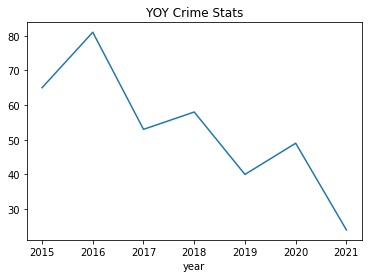

In [170]:
YoY('H9G').plot(title='YOY Crime Stats')

In [171]:
def crime_by_year(postal_code,year):
    df_new = df_eng.loc[(df_eng['postal codes'] == postal_code) & (df_eng['year'] == year)]
    return df_new.groupby('categorie')['neighbourhood'].count()
    
    
    

In [172]:
crime_by_year('H3G','2021')

categorie
Confirmed Theft                     7
Home Invasion                      24
Mischief                           46
Motor vehicle theft                11
Theft in / from a motor vehicle    33
Name: neighbourhood, dtype: int64

In [173]:
df_eng.rename(columns={'categorie':'category','postal codes':'postal_first_3'}, inplace=True)
df_eng.head()

,category,date,quart,long lat,postal_code,city,postal_first_3,neighbourhood,year
0,Motor vehicle theft,2018-09-13,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-Michel,2018
1,Motor vehicle theft,2018-04-30,jour,"-73.626, 45.567",H1Z 1S9,MONTREAL,H1Z,Saint-Michel,2018
2,Home Invasion,2018-01-10,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018
3,Mischief,2018-11-12,soir,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018
4,Mischief,2018-08-15,jour,"-73.629, 45.569",H1Z 2V6,MONTREAL,H1Z,Saint-Michel,2018


In [174]:
df_eng.to_csv('Crime_db_eng.csv')

In [175]:
def get_neighbourhood(postal):
    hood = df_eng.loc[df_eng['postal_first_3'] == postal, 'neighbourhood']
    return ''.join(hood.unique())


In [176]:
get_neighbourhood('H3G')

'Downtown Montreal'

In [177]:
def compare_postal(postal_1,postal_2):
    df_compare_1 = df_eng.loc[(df_eng['postal_first_3'] == postal_1)]
    df_compare_2 = df_eng.loc[(df_eng['postal_first_3'] == postal_2)]
    df_c_1_gb = df_compare_1.groupby('year')['postal_first_3'].count().reset_index().rename(columns={'postal_first_3':postal_1})
    df_c_2_gb = df_compare_2.groupby('year')['postal_first_3'].count().reset_index().rename(columns={'postal_first_3':postal_2})
    postal_row = df_c_2_gb[postal_2]
    df_c_merged = df_c_1_gb.join(postal_row)
    return df_c_merged.plot()




<AxesSubplot:>

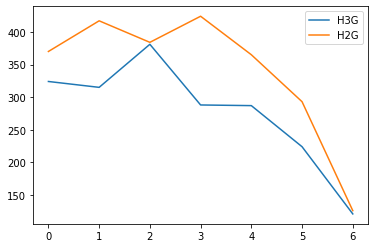

In [178]:
compare_postal('H3G','H2G')

In [179]:
neighbourhood = df_eng.neighbourhood.unique()
neighbourhood = sorted(neighbourhood)
neighbourhood

['Ahuntsic',
 'Anjou',
 'Beaconsfield',
 'Cartierville',
 'Centre-Sud',
 'Côte Saint-Luc',
 'Côte-des-Neiges',
 'Dollard-des-Ormeaux',
 'Dorval',
 "Dorval / L'Île-Dorval",
 'Downtown Montreal',
 'Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)',
 'Hampstead / Côte Saint-Luc',
 'Hochelaga',
 'Kirkland',
 "L'Île-Bizard",
 "L'Île-Des-Soeurs",
 'Lachine',
 'Lasalle',
 'Maisonneuve',
 'Mercier',
 'Montreal East',
 'Montreal West',
 'Montréal-Nord',
 'Mount Royal',
 'Notre-Dame-de-Grâce',
 'Old Montreal',
 'Outremont',
 'Parc-Extension',
 'Petite-Bourgogne',
 'Petite-Patrie',
 'Pierrefonds',
 'Pierrefonds-Roxboro',
 'Plateau Mont-Royal',
 'Pointe-Claire',
 'Pointe-Saint-Charles',
 'Pointe-aux-Trembles',
 'Rivière-des-Prairies',
 'Rosemont',
 'Saint-Henri',
 'Saint-Laurent',
 'Saint-Léonard',
 'Saint-Michel',
 'Saint-Michel,East',
 'Sainte-Anne-De-Bellevue',
 'Sainte-Geneviève / Pierrefonds',
 'Senneville',
 'Verdun',
 'Ville Émard',
 'Villeray',
 'Westmount']

In [180]:
df_eng['count'] = 1

In [181]:

def top_4_by_crime(crime,year):
    df_Home_invasions = df_eng[['postal_first_3','year','neighbourhood','count','category']]
    df_Home_invasions = df_Home_invasions.loc[(df_eng['category'] == crime) & (df_eng['year'] == year)]
    df_Home_invasions
    df_hi_gb = df_Home_invasions.groupby('postal_first_3')['neighbourhood'].value_counts()
    df_hi_gb = df_hi_gb.sort_values(ascending=False)
    df_hi_gb = df_hi_gb.to_frame()
    df_hi_gb.rename(columns={'neighbourhood':'hood'}, inplace=True)
    df_hi_gb.rename(columns={'hood':'# of home invastions'}, inplace=True)
    return df_hi_gb





In [182]:
top_4_by_crime('Offenses resulting in death','2021')

,,# of home invastions
postal_first_3,neighbourhood,
H1H,Montréal-Nord,3
H1W,Hochelaga,1
H2J,Plateau Mont-Royal,1
H3N,Parc-Extension,1
H4W,Côte Saint-Luc,1
H8R,Lasalle,1


In [183]:
df_eng.to_csv('Montreal_Crime_app.csv')